In [89]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# import pandas_datareader as pdr

from datetime import datetime


warnings.filterwarnings('once')

The data can either be accessed using a <b>pandas_datareader</b> library or be downloaded directly in .csv formaat using the url https://finance.yahoo.com/quote/MSFT/history?period1=1516233600&period2=1674000000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true.

Since currently yahoo have made some changes in their API, the code `pdr.get_data_yahoo('MSFT')` is unable to fetch the data, so we'll be working by downloading the data in csv format from the above url.

In [2]:
# pdr.get_data_yahoo('MSFT')

In [3]:
df = pd.read_csv('MSFT.csv', parse_dates=['Date'])
df.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2017-01-18  62.669998  62.700001  62.119999  62.500000  57.571678  19670100
1 2017-01-19  62.240002  62.980000  62.200001  62.299999  57.387444  18451700
2 2017-01-20  62.669998  62.820000  62.369999  62.740002  57.792763  30213500
3 2017-01-23  62.700001  63.119999  62.570000  62.959999  57.995399  23097600
4 2017-01-24  63.200001  63.740002  62.939999  63.520000  58.511246  24672900

In [4]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1505 2023-01-10  227.759995  231.309998  227.330002  228.850006  228.850006   
1506 2023-01-11  231.289993  235.949997  231.110001  235.770004  235.770004   
1507 2023-01-12  235.259995  239.899994  233.559998  238.509995  238.509995   
1508 2023-01-13  237.000000  239.369995  234.919998  239.229996  239.229996   
1509 2023-01-17  237.970001  240.910004  237.089996  240.350006  240.350006   

        Volume  
1505  27033900  
1506  28669300  
1507  27269500  
1508  21317700  
1509  29831300

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.index.dtype

dtype('<M8[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-18 to 2023-01-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


In [8]:
df[df.isna().any(1)]

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

None of the columns has <b>NAN</b> values here. Also type conversion of column values is not needed.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Date'>

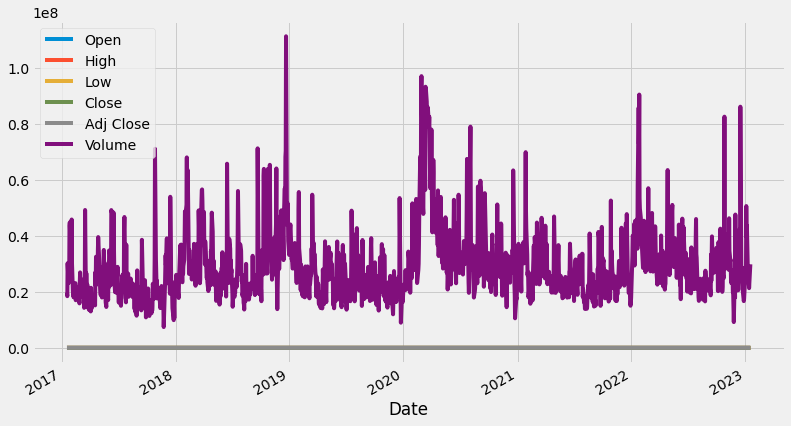

In [9]:
df.plot(figsize=(12,7))

<AxesSubplot:title={'center':'Microsoft stock closing share value'}, xlabel='Date'>

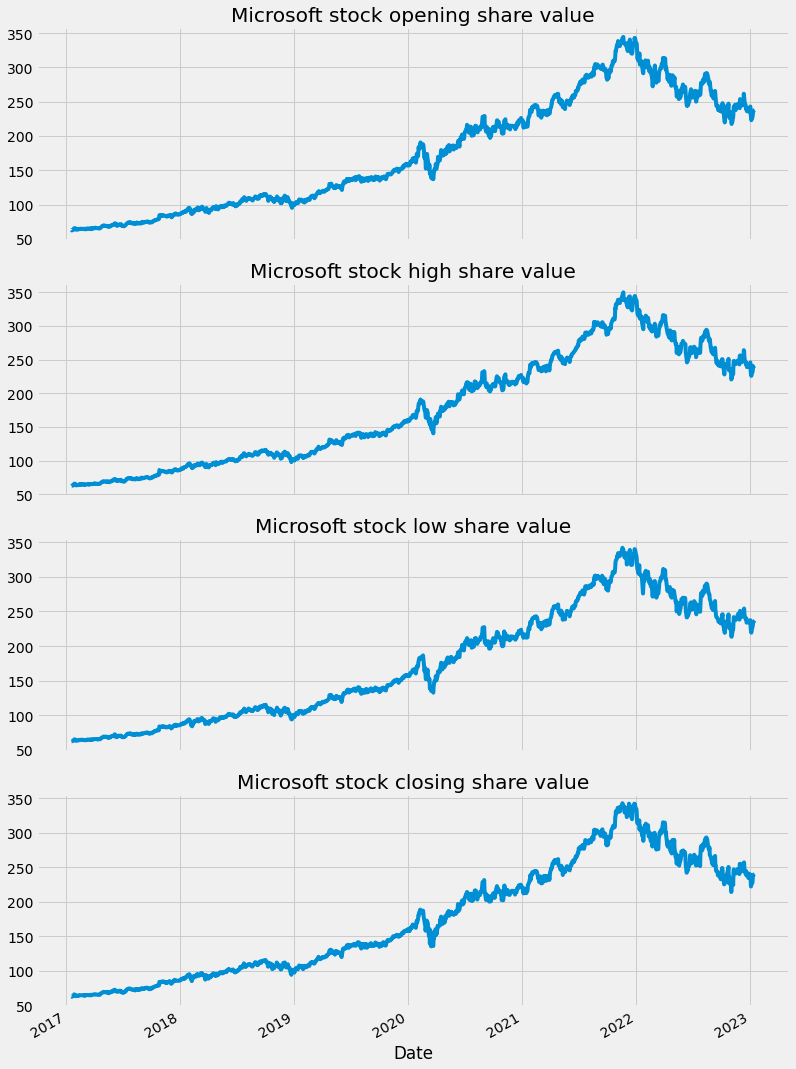

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(12,20), sharex=True)

df['Open'].plot(ax=ax[0], title='Microsoft stock opening share value')
df['High'].plot(ax=ax[1], title='Microsoft stock high share value')
df['Low'].plot(ax=ax[2], title='Microsoft stock low share value')
df['Close'].plot(ax=ax[3], title='Microsoft stock closing share value')

<AxesSubplot:title={'center':'Microsoft stock closing share value'}, xlabel='Date', ylabel='Price USD($)'>

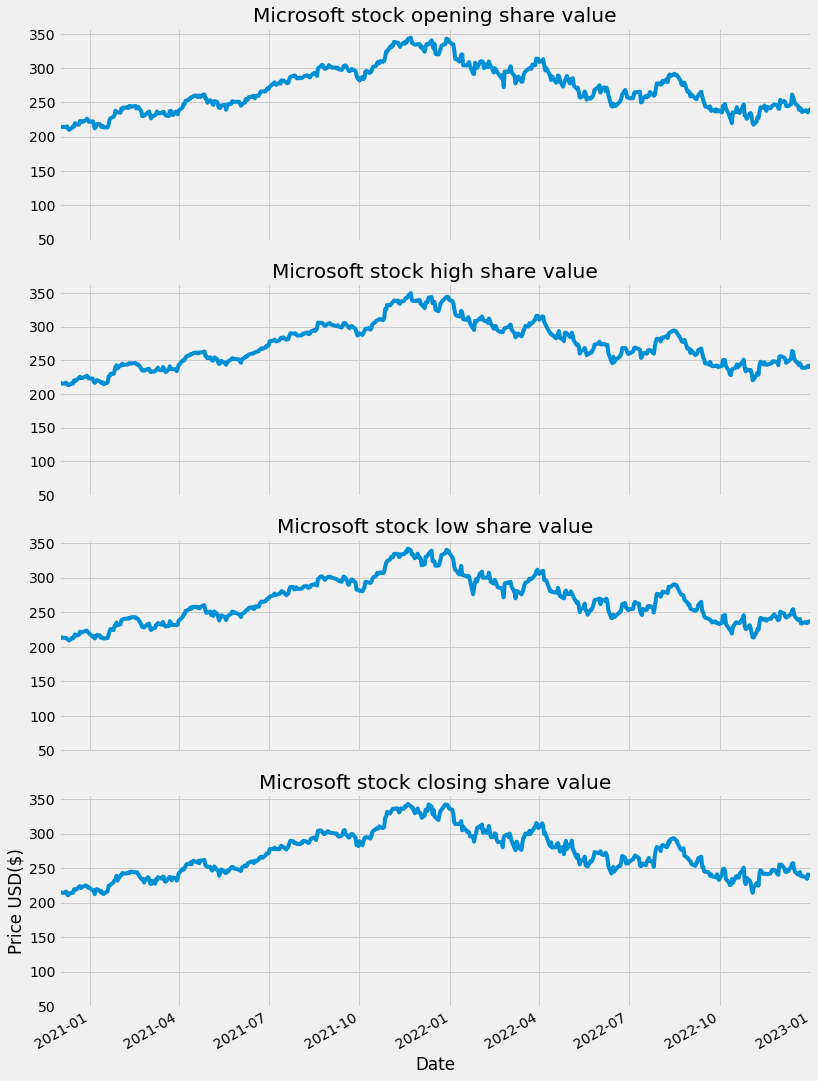

In [11]:
# let's visualize only the part of the graph on which the microsoft value goes up really high
fig, ax = plt.subplots(4, 1, figsize=(12,20), sharex=True, sharey=False)
plt.ylabel('Price USD($)')
# fig.autofmt_xdate()
# plt.tight_layout()

df['Open'].plot(ax=ax[0], xlim=['2020-12-01', '2023-01-01'], title='Microsoft stock opening share value')
df['High'].plot(ax=ax[1], xlim=['2020-12-01', '2023-01-01'], title='Microsoft stock high share value')
df['Low'].plot(ax=ax[2], xlim=['2020-12-01', '2023-01-01'], title='Microsoft stock low share value')
df['Close'].plot(ax=ax[3], xlim=['2020-12-01', '2023-01-01'], title='Microsoft stock closing share value')

## Time Resampling
### Upsampling

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-31   87.120003   87.500000   86.230003   86.849998   81.787941   
2018-12-31  115.419998  116.180000  114.930000  115.610001  110.279938   
2019-12-31  159.449997  159.550003  158.220001  158.960007  154.538162   
2020-12-31  229.270004  232.860001  227.350006  231.649994  226.997528   
2021-12-31  344.619995  349.670013  342.200012  343.109985  339.924805   
2022-12-31  335.350006  338.000000  329.779999  334.750000  331.642426   
2023-12-31  243.080002  245.750000  237.399994  240.350006  240.350006   

               Volume  
Date                   
2017-12-31   71066700  
2018-12-31  111242100  
2019-12-31   55636400  
2020-12-31   97012700  
2021-12-31   69870600  
2022-12-31   90428900  
2023-12-31   50623400

<AxesSubplot:xlabel='Date'>

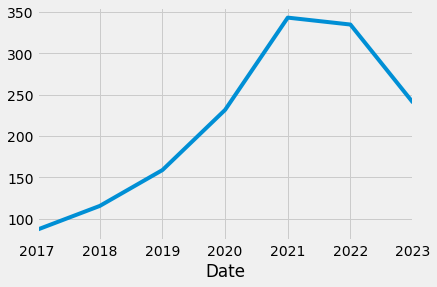

In [12]:
annual_stock = df.resample('A').max()
display(annual_stock)

annual_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

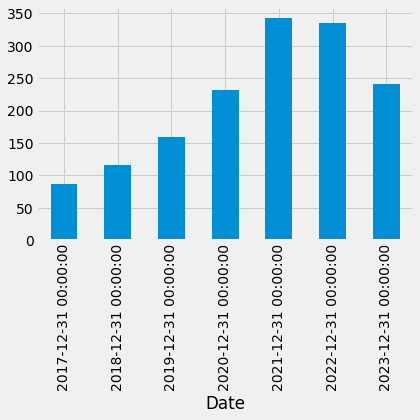

In [13]:
annual_stock['Close'].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

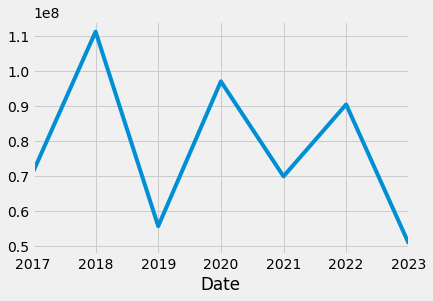

In [14]:
annual_stock['Volume'].plot()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-10-01  226.309998  228.119995  223.580002  224.960007  221.019012   
2021-01-01  245.029999  246.130005  242.919998  244.990005  240.698090   
2021-04-01  270.690002  271.649994  269.600006  271.399994  267.876678   
2021-07-01  305.019989  305.839996  302.000000  305.220001  301.834412   
2021-10-01  344.619995  349.670013  342.200012  343.109985  339.924805   
2022-01-01  335.350006  338.000000  329.779999  334.750000  331.642426   
2022-04-01  313.269989  315.109985  309.869995  314.970001  312.691284   
2022-07-01  291.989990  294.179993  290.420013  293.470001  292.025421   
2022-10-01  261.690002  263.920013  254.309998  257.220001  257.220001   
2023-01-01  243.080002  245.750000  237.399994  240.350006  240.350006   

              Volume  
Date                  
2020-10-01  63354900  
2021-01-01  69870600  
2021-04-01  46903100  
2021-07-01  43186200  
2021-10-01  52588700  
2022-01-01  90428900  
2022-04-01  63477700  
2022-07-01  45994000  
2022-10-01  86102000  
2023-01-01  50623400

<AxesSubplot:xlabel='Date'>

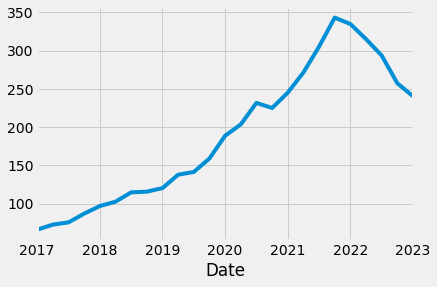

In [15]:
quarterly_stock = df.resample('QS').max()
display(quarterly_stock.tail(10))
quarterly_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

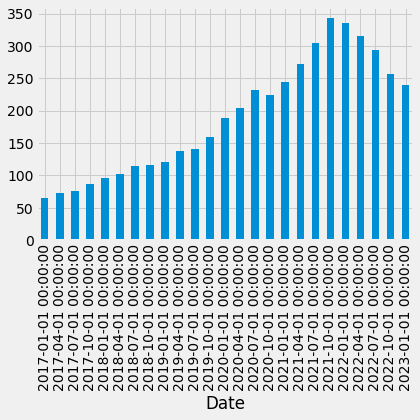

In [16]:
quarterly_stock['Close'].plot(kind='bar')

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-01-31  65.690002  65.910004  64.889999  65.779999  60.593033  44818000
2017-02-28  64.739998  65.239998  64.449997  64.720001  59.885384  45827000
2017-03-31  65.650002  66.190002  65.449997  65.860001  61.034527  49219700
2017-04-30  68.910004  69.139999  67.690002  68.459999  63.444038  39548800
2017-05-31  70.529999  70.739998  69.809998  70.410004  65.625160  34956000

<AxesSubplot:xlabel='Date'>

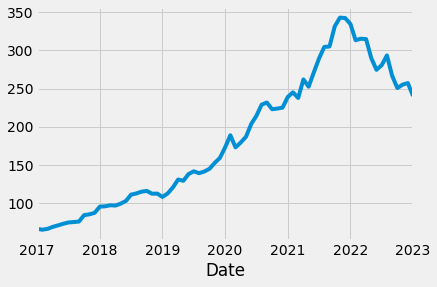

In [17]:
monthly_stock = df.resample('M').max()
display(monthly_stock.head())

monthly_stock['Close'].plot()

<AxesSubplot:xlabel='Date'>

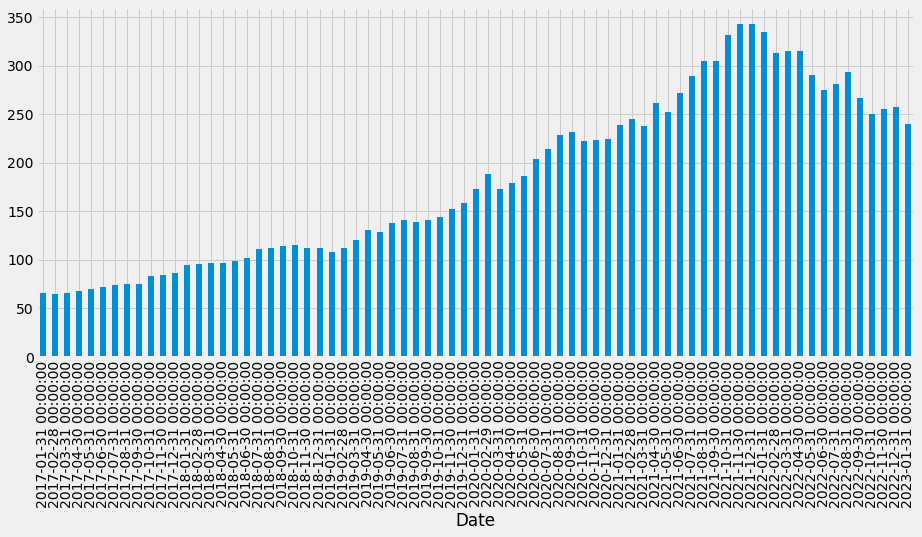

In [18]:
monthly_stock['Close'].plot(kind='bar', figsize=(14,6))

After exploring and visualizing the above plote we can notice that there is some upward and downward trend in our dataset. Most probably the dataset is not stationary.

# Stationarity Check
## Summary statistics and plot
Though this is not the most rigorous method to check the stationarity of the data, it gives a good sense of whether the data is stationary or not.

<AxesSubplot:>

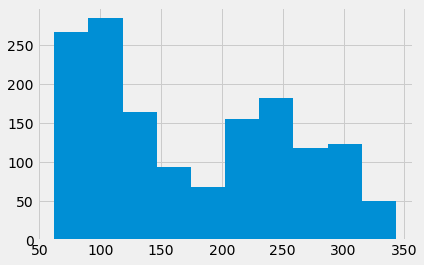

In [19]:
df['Close'].hist()

In [20]:
chunks = np.split(df['Close'], indices_or_sections=10)
print('Mean: ', np.mean(chunks, axis=1))
print('\nVariance: ',np.var(chunks, axis=1))

Mean:  [ 68.03966922  84.41152331 103.64410611 113.69966901 142.99715238
 182.66649026 221.16807929 277.52960237 302.22841033 250.99344336]

Variance:  [ 11.59197866  49.8547398   46.5124306   88.96238242  71.38420441
 405.25823545 139.67014173 525.42642763 629.28894424 303.87170849]


To get even more sophisticated understanding of the change in mean and variance let's plot the histogram of mean and variance.

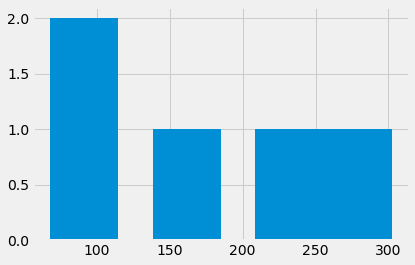

In [21]:
pd.Series(np.mean(chunks, axis=1)).hist();

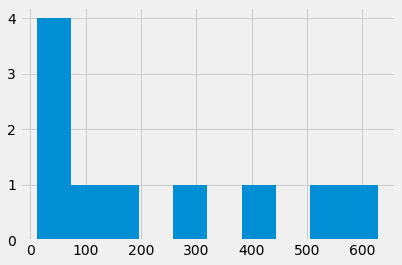

In [22]:
pd.Series(np.var(chunks, axis=1)).hist();

For a data to be stationary, it should have constant mean and variance across the time series. But in case of our dataset, the mean and the variance is changing drastically over time which means that out data is not stationary. 

As this is not an accurate way to check for the stationarity of the data, let's use some statistical tests like <b>Augmeted Dickey-Fuller Test</b> to check for the stationarity.
### Augmented Dickey-Fuller (ADF) Test
adfuller() returns adf, pvalue, usedlag, nobs, critical_values, icbest<br>
<b>Null Hypothesis</b>: Series is not stationary.<br>
<b>Alternative Hypothesis</b>: Series is stationary.<br>
1. If p-value < threshold, reject null hyppothesis.<br>
2. If p-value ≥ threshold, accept null hypothesis. <br>

Generally, we take <b>0.05</b> as a threshold value.

In [23]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df['Close'])

In [24]:
def adf_test(timeseries):
    test_stat = adfuller(timeseries)
    result = pd.Series({'ADF statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2],
                        'Observations used': test_stat[3]})
    for key, value in test_stat[4].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is not stationary.")
    return result

In [25]:
adf_test(df['Close'])


Accept null hypothesis! Indicates that the data is not stationary.


ADF statistic             -1.144897
p-value                    0.696840
Used lags                  9.000000
Observations used       1500.000000
Critical value (1%)       -3.434717
Critical value (5%)       -2.863469
Critical value (10%)      -2.567797
dtype: float64

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
ADF and KPSS has just opposite assumption. A key difference from ADF test is the null hypothesis of the KPSS test is that the series is stationary.<br><br>
<b>Null Hypothesis</b>: Series is stationary.<br>
<b>Alternative Hypothesis</b>: Series is not stationary.<br>
1. If p-value < threshold, reject null hyppothesis.<br>
2. If p-value ≥ threshold, accept null hypothesis. <br>

Generally, we take <b>0.05</b> as a threshold value.

kpss() returns kpss_stat, p_value, lags, crit

In [88]:
from statsmodels.tsa.stattools import kpss

kpss_stat, p_value, lags, crit = kpss(df['Close']);

/home/sushmita/anaconda3/envs/tfEnv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [27]:
def kpss_test(timeseries):
    test_stat = kpss(timeseries)
    result = pd.Series({'KPSS statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2]})
    for key, value in test_stat[3].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is not stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is stationary.")
    return result

In [28]:
kpss_test(df['Close'])


Reject null hypothesis! Indicates that the data is not stationary.


/home/sushmita/anaconda3/envs/tfEnv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS statistic            5.54623
p-value                   0.01000
Used lags                25.00000
Critical value (10%)      0.34700
Critical value (5%)       0.46300
Critical value (2.5%)     0.57400
Critical value (1%)       0.73900
dtype: float64

Both tests <b>ADF</b> and <b>KPSS</b> conclude that our data is not stationary

## Smoothing
## Simple Moving Average

In [29]:
# df.drop('Open: 15 days rolling', axis=1, inplace=True)

In [30]:
df['Close: 15 days rolling'] = df['Close'].rolling(window=15, min_periods=2).mean()
df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2017-01-18  62.669998  62.700001  62.119999  62.500000  57.571678  19670100   
2017-01-19  62.240002  62.980000  62.200001  62.299999  57.387444  18451700   
2017-01-20  62.669998  62.820000  62.369999  62.740002  57.792763  30213500   
2017-01-23  62.700001  63.119999  62.570000  62.959999  57.995399  23097600   
2017-01-24  63.200001  63.740002  62.939999  63.520000  58.511246  24672900   

            Close: 15 days rolling  
Date                                
2017-01-18                     NaN  
2017-01-19               62.399999  
2017-01-20               62.513334  
2017-01-23               62.625000  
2017-01-24               62.804000

<AxesSubplot:xlabel='Date'>

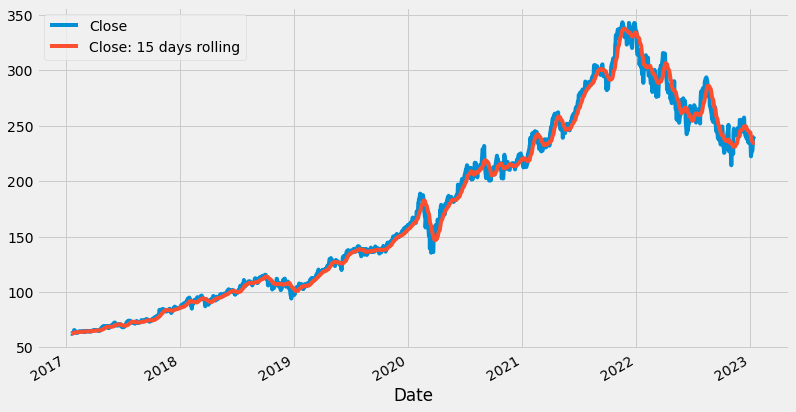

In [31]:
df[['Close', 'Close: 15 days rolling']].plot(figsize=(12,7))

In [32]:
adf_test(df['Close: 15 days rolling'].fillna(0))


Accept null hypothesis! Indicates that the data is not stationary.


ADF statistic             -1.178981
p-value                    0.682572
Used lags                 23.000000
Observations used       1486.000000
Critical value (1%)       -3.434758
Critical value (5%)       -2.863487
Critical value (10%)      -2.567807
dtype: float64

In [33]:
df['Close: 30 days rolling'] = df['Close'].rolling(window=30, min_periods=2).mean()
df['Close: 60 days rolling'] = df['Close'].rolling(window=60, min_periods=2).mean()

<AxesSubplot:xlabel='Date'>

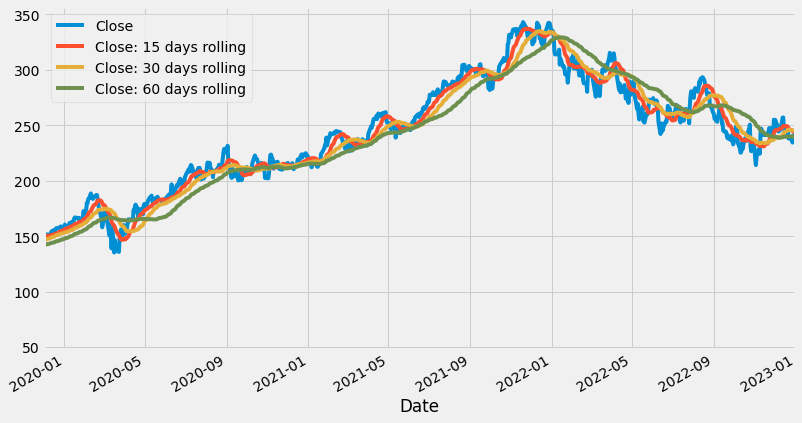

In [34]:
df[['Close', 'Close: 15 days rolling', 
    'Close: 30 days rolling','Close: 60 days rolling']].plot(xlim=['2019-12-01', '2023-01-01'],figsize=(12,7))

In [35]:
adf_test(df['Close: 60 days rolling'].fillna(0))


Accept null hypothesis! Indicates that the data is not stationary.


ADF statistic             -1.218854
p-value                    0.665433
Used lags                 10.000000
Observations used       1499.000000
Critical value (1%)       -3.434720
Critical value (5%)       -2.863470
Critical value (10%)      -2.567798
dtype: float64

## Cumulative Moving Average
Replacing each data point in each time series by the average of the previous data points in the same time series.

<AxesSubplot:xlabel='Date'>

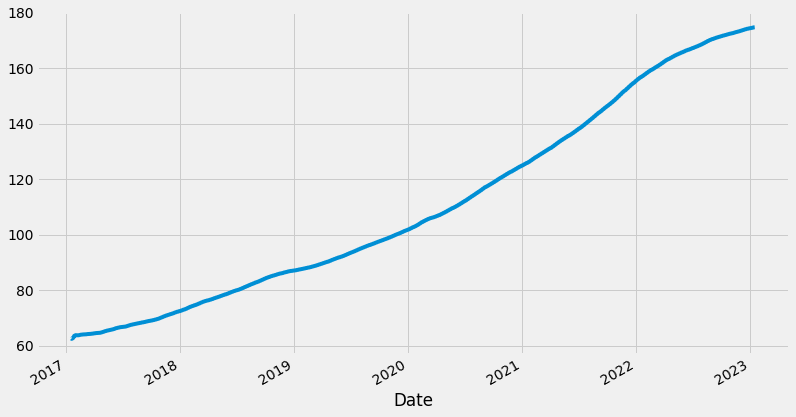

In [36]:
df['Close'].expanding().mean().plot(figsize=(12,7))

## Exponential Moving Average

<AxesSubplot:xlabel='Date'>

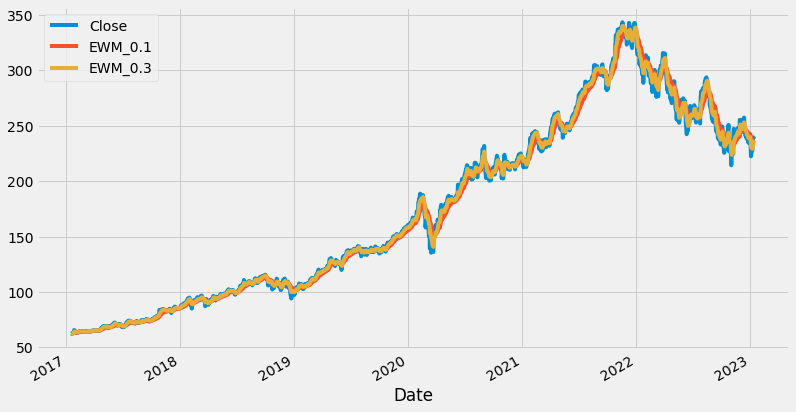

In [37]:
# exponential moving average
# alpha here is smoothening parameter
df['EWM_0.1'] = df['Close'].ewm(alpha=0.1, adjust=False).mean()
df['EWM_0.3'] = df['Close'].ewm(alpha=0.3, adjust=False).mean()

df[['Close', 'EWM_0.1', 'EWM_0.3']].plot(figsize=(12,7))

Line with smoothening parameter (alpha) 0.3 is looking better than 0.1 as it is more towards the original data points.

In [38]:
# df.drop(['EWMA_5days', 'EWMA_10days'], inplace=True, axis=1)

<AxesSubplot:xlabel='Date'>

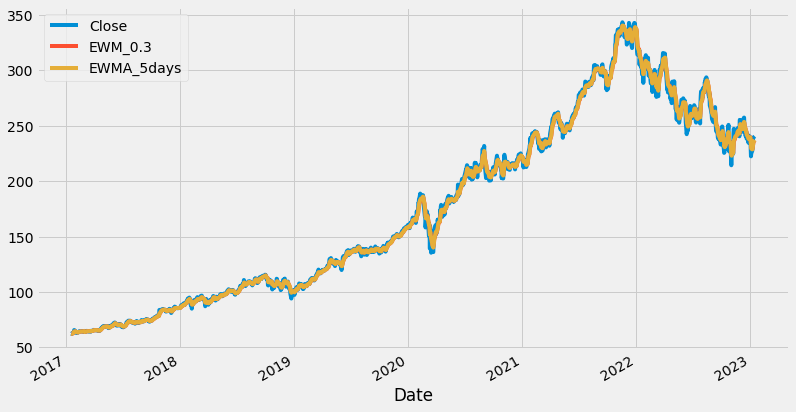

In [39]:
# exponential weighted moving average of 5 days
# we're calculating EWMA by specifying span parameter in ewm() function
df['EWMA_5days'] = df['Close'].ewm(span=5).mean()

df[['Close', 'EWM_0.3', 'EWMA_5days']].plot(figsize=(12,7))

In [40]:
adf_test(df['EWMA_5days'])


Accept null hypothesis! Indicates that the data is not stationary.


ADF statistic             -1.136932
p-value                    0.700122
Used lags                 10.000000
Observations used       1499.000000
Critical value (1%)       -3.434720
Critical value (5%)       -2.863470
Critical value (10%)      -2.567798
dtype: float64

Here we see that our data is still not stationary. So to make it stationary we'll use differencing.
## Differencing

In [41]:
df['Close - First order difference'] = df['Close'] - df['Close'].shift(1)

In [42]:
df['Close - First order difference'].head()

Date
2017-01-18         NaN
2017-01-19   -0.200001
2017-01-20    0.440003
2017-01-23    0.219997
2017-01-24    0.560001
Name: Close - First order difference, dtype: float64

In [43]:
adf_test(df['Close - First order difference'].dropna())


Reject null hypothesis! Indicates that the data is stationary.


ADF statistic          -1.314485e+01
p-value                 1.405134e-24
Used lags               8.000000e+00
Observations used       1.500000e+03
Critical value (1%)    -3.434717e+00
Critical value (5%)    -2.863469e+00
Critical value (10%)   -2.567797e+00
dtype: float64

In [44]:
kpss_test(df['Close - First order difference'].dropna())


Accept null hypothesis! Indicates that the data is stationary.


/home/sushmita/anaconda3/envs/tfEnv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS statistic           0.127471
p-value                  0.100000
Used lags                5.000000
Critical value (10%)     0.347000
Critical value (5%)      0.463000
Critical value (2.5%)    0.574000
Critical value (1%)      0.739000
dtype: float64

So after first order differecing both test statistics are saying that our series is stationary. 

<AxesSubplot:xlabel='Date'>

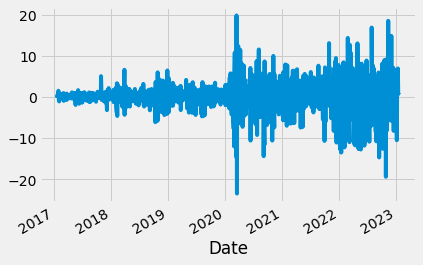

In [45]:
df['Close - First order difference'].plot()

<AxesSubplot:>

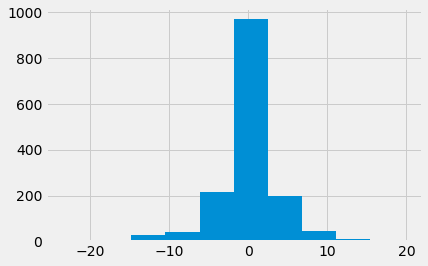

In [46]:
df['Close - First order difference'].hist()

On the above histogram we see that the series is following normal distribution after making it stationary. If the variables in the series follows gaussian distribution then the series is called Gaussian White Noise, it is random....It means all variables are independently and identically distributed with mean 0 and the same variance. Each values has 0 correlation with all other values in the series. Such data cannot be modeled and prediction cannot be made using them.

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

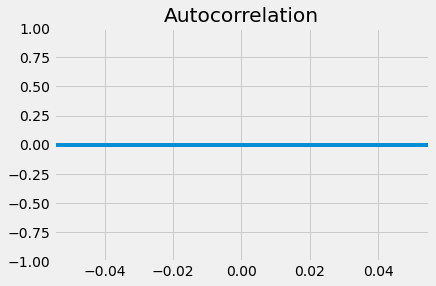

In [48]:
plot_acf(df['Close - First order difference']);

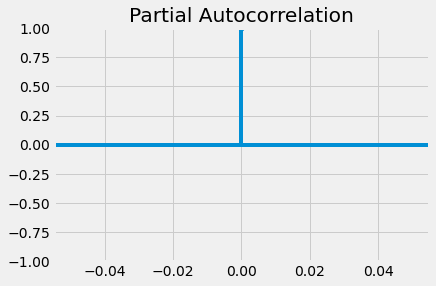

In [49]:
plot_pacf(df['Close - First order difference']);

## Time Series Decomposition
Decomposition of time series into 3 components
1. Trend
2. Seasonality
3. Residual 

<AxesSubplot:xlabel='Date'>

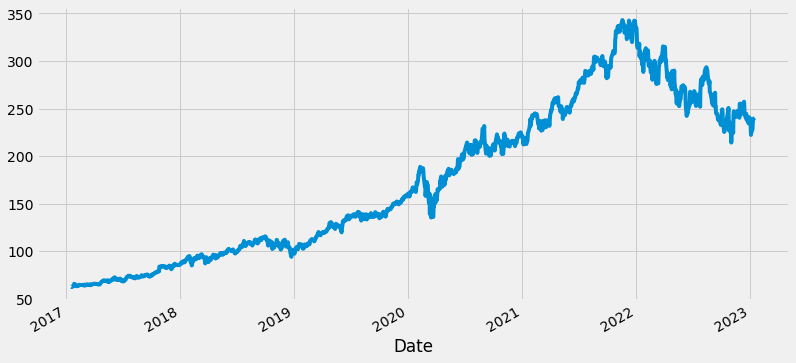

In [50]:
df['Close'].plot(figsize=(12,6))

In [51]:
print(df.index.freq)

None


In [52]:
[type(df.index), df.index.dtype]

[pandas.core.indexes.datetimes.DatetimeIndex, dtype('<M8[ns]')]

In [53]:
print(df.index.inferred_freq)

None


In [54]:
# Standardizing the DatetimeIndex
# The frequency of the DateTime index is None so we've to set it to some datetime period
# Our datetime index has some missing days (weekend days- saturday and sunday along with some other missing dates)
# So we'll seet the frequency as 'B' business day and treat the missing values using fillna() functio
new_index = df.asfreq('B').index
new_index

DatetimeIndex(['2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31',
               ...
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-16', '2023-01-17'],
              dtype='datetime64[ns]', name='Date', length=1565, freq='B')

In [55]:
df_new = df.reindex(new_index, fill_value=np.NAN)

In [56]:
print(df_new.index.freq)

<BusinessDay>


In [57]:
df_new.shape[0] - df.shape[0]

55

In [58]:
df_new[df_new.isna().any(1)]

Open       High        Low  Close  Adj Close      Volume  \
Date                                                                        
2017-01-18  62.669998  62.700001  62.119999   62.5  57.571678  19670100.0   
2017-02-20        NaN        NaN        NaN    NaN        NaN         NaN   
2017-04-14        NaN        NaN        NaN    NaN        NaN         NaN   
2017-05-29        NaN        NaN        NaN    NaN        NaN         NaN   
2017-07-04        NaN        NaN        NaN    NaN        NaN         NaN   
2017-09-04        NaN        NaN        NaN    NaN        NaN         NaN   
2017-11-23        NaN        NaN        NaN    NaN        NaN         NaN   
2017-12-25        NaN        NaN        NaN    NaN        NaN         NaN   
2018-01-01        NaN        NaN        NaN    NaN        NaN         NaN   
2018-01-15        NaN        NaN        NaN    NaN        NaN         NaN   
2018-02-19        NaN        NaN        NaN    NaN        NaN         NaN   
2018-03-30        NaN        NaN        NaN    NaN        NaN         NaN   
2018-05-28        NaN        NaN        NaN    NaN        NaN         NaN   
2018-07-04        NaN        NaN        NaN    NaN        NaN         NaN   
2018-09-03        NaN        NaN        NaN    NaN        NaN         NaN   
2018-11-22        NaN        NaN        NaN    NaN        NaN         NaN   
2018-12-05        NaN        NaN        NaN    NaN        NaN         NaN   
2018-12-25        NaN        NaN        NaN    NaN        NaN         NaN   
2019-01-01        NaN        NaN        NaN    NaN        NaN         NaN   
2019-01-21        NaN        NaN        NaN    NaN        NaN         NaN   
2019-02-18        NaN        NaN        NaN    NaN        NaN         NaN   
2019-04-19        NaN        NaN        NaN    NaN        NaN         NaN   
2019-05-27        NaN        NaN        NaN    NaN        NaN         NaN   
2019-07-04        NaN        NaN        NaN    NaN        NaN         NaN   
2019-09-02        NaN        NaN        NaN    NaN        NaN         NaN   
2019-11-28        NaN        NaN        NaN    NaN        NaN         NaN   
2019-12-25        NaN        NaN        NaN    NaN        NaN         NaN   
2020-01-01        NaN        NaN        NaN    NaN        NaN         NaN   
2020-01-20        NaN        NaN        NaN    NaN        NaN         NaN   
2020-02-17        NaN        NaN        NaN    NaN        NaN         NaN   
2020-04-10        NaN        NaN        NaN    NaN        NaN         NaN   
2020-05-25        NaN        NaN        NaN    NaN        NaN         NaN   
2020-07-03        NaN        NaN        NaN    NaN        NaN         NaN   
2020-09-07        NaN        NaN        NaN    NaN        NaN         NaN   
2020-11-26        NaN        NaN        NaN    NaN        NaN         NaN   
2020-12-25        NaN        NaN        NaN    NaN        NaN         NaN   
2021-01-01        NaN        NaN        NaN    NaN        NaN         NaN   
2021-01-18        NaN        NaN        NaN    NaN        NaN         NaN   
2021-02-15        NaN        NaN        NaN    NaN        NaN         NaN   
2021-04-02        NaN        NaN        NaN    NaN        NaN         NaN   
2021-05-31        NaN        NaN        NaN    NaN        NaN         NaN   
2021-07-05        NaN        NaN        NaN    NaN        NaN         NaN   
2021-09-06        NaN        NaN        NaN    NaN        NaN         NaN   
2021-11-25        NaN        NaN        NaN    NaN        NaN         NaN   
2021-12-24        NaN        NaN        NaN    NaN        NaN         NaN   
2022-01-17        NaN        NaN        NaN    NaN        NaN         NaN   
2022-02-21        NaN        NaN        NaN    NaN        NaN         NaN   
2022-04-15        NaN        NaN        NaN    NaN        NaN         NaN   
2022-05-30        NaN        NaN        NaN    NaN        NaN         NaN   
2022-06-20        NaN        NaN        NaN    NaN        NaN         NaN   
2022-07-04   

#### Now let's fill these missing NaN values using fillna() function. But we're not gonna replace the missing values of the very first row because those NaN values were formed as a result of smoothing process.

In [59]:
df_new.fillna(method='pad', inplace=True, axis=0) 
# pad method propagates the last valid observation to the missing value rowwise 

In [60]:
df_new[df_new.isna().any(1)]
# since the pad method donot find any values before the very first NaN values, it left the NaN values as it is

Open       High        Low  Close  Adj Close      Volume  \
Date                                                                        
2017-01-18  62.669998  62.700001  62.119999   62.5  57.571678  19670100.0   

            Close: 15 days rolling  Close: 30 days rolling  \
Date                                                         
2017-01-18                     NaN                     NaN   

            Close: 60 days rolling  EWM_0.1  EWM_0.3  EWMA_5days  \
Date                                                               
2017-01-18                     NaN     62.5     62.5        62.5   

            Close - First order difference  
Date                                        
2017-01-18                             NaN

In [61]:
df_new.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close: 15 days rolling', 'Close: 30 days rolling',
       'Close: 60 days rolling', 'EWM_0.1', 'EWM_0.3', 'EWMA_5days',
       'Close - First order difference'],
      dtype='object')

In [62]:
# df_new.drop(['Open: 15 days rolling', 'Open: 30 days rolling', 
#             'Open: 60 days rolling', 'EWM_0.1', 'EWM_0.3', 'EWMA_5days'], inplace=True, axis=1)

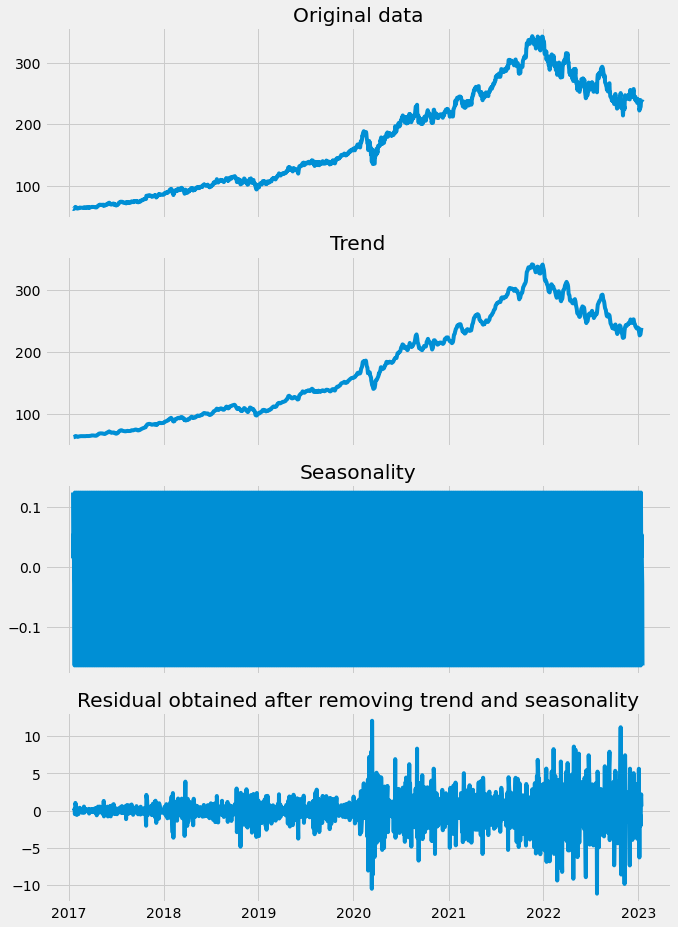

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

#since the magnitude of seasonal values in our dataset is independent of trend we'll use additive decomposition
decomposition_result = seasonal_decompose(x=df_new['Close'], model='additive')
fig, ax = plt.subplots(4,1, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(10)

ax[0].plot(df_new['Close'])
ax[0].title.set_text('Original data')

ax[1].plot(decomposition_result.trend)
ax[1].title.set_text('Trend')

ax[2].plot(decomposition_result.seasonal)
ax[2].title.set_text('Seasonality')

ax[3].plot(decomposition_result.resid)
ax[3].title.set_text('Residual obtained after removing trend and seasonality')


<AxesSubplot:xlabel='Date'>

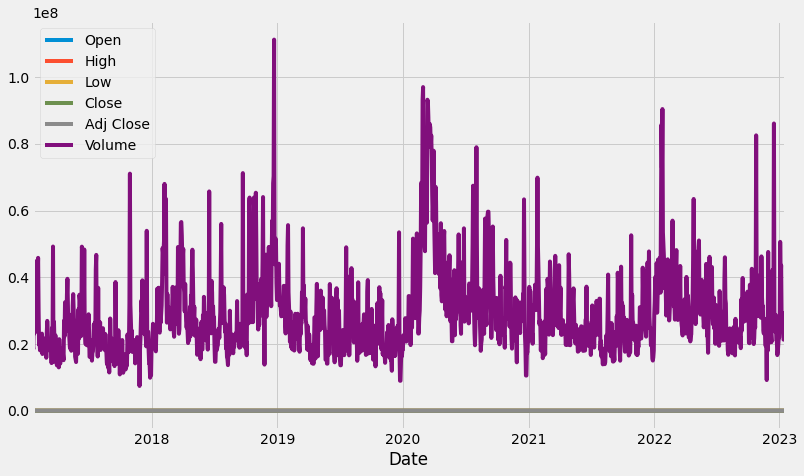

In [64]:
df_new[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].plot(figsize=(12,7))

In [65]:
adf_test(decomposition_result.resid.fillna(0))


Reject null hypothesis! Indicates that the data is stationary.


ADF statistic          -1.389318e+01
p-value                 5.916518e-26
Used lags               2.200000e+01
Observations used       1.542000e+03
Critical value (1%)    -3.434598e+00
Critical value (5%)    -2.863416e+00
Critical value (10%)   -2.567769e+00
dtype: float64

In [66]:
adf_test(decomposition_result.resid.dropna())


Reject null hypothesis! Indicates that the data is stationary.


ADF statistic          -1.386230e+01
p-value                 6.694628e-26
Used lags               2.200000e+01
Observations used       1.538000e+03
Critical value (1%)    -3.434609e+00
Critical value (5%)    -2.863421e+00
Critical value (10%)   -2.567771e+00
dtype: float64

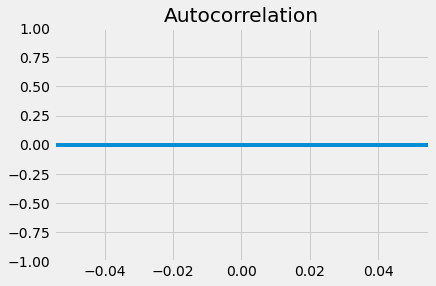

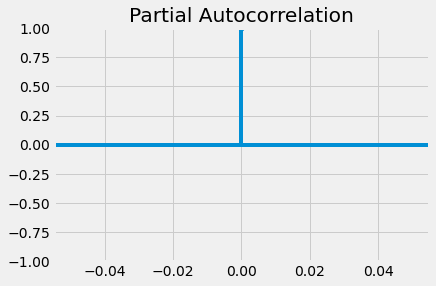

In [67]:
plot_acf(decomposition_result.resid);
plot_pacf(decomposition_result.resid);

## Linear Regression

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [349]:
new_df = data.reset_index()
new_df = new_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [350]:
new_df.head()

Open       High        Low      Close    Volume
0  62.669998  62.700001  62.119999  62.500000  19670100
1  62.240002  62.980000  62.200001  62.299999  18451700
2  62.669998  62.820000  62.369999  62.740002  30213500
3  62.700001  63.119999  62.570000  62.959999  23097600
4  63.200001  63.740002  62.939999  63.520000  24672900

In [351]:
X = new_df[['Open', 'High', 'Low', 'Volume']]
y = new_df['Close']

In [352]:
train, test = train_test_split(new_df, test_size=0.3, random_state=0, shuffle=False)
xtrain = train[['Open', 'High', 'Low', 'Volume']]
ytrain = train['Close']

xtest = test[['Open', 'High', 'Low', 'Volume']]
ytest = test['Close']

In [353]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

In [354]:
ypredicted = reg.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, ypredicted))
print(rmse)

In [355]:
df_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypredicted})
df_pred.head()

Actual   Predicted
1057  235.770004  237.452349
1058  242.350006  241.748763
1059  249.070007  248.506372
1060  247.860001  248.671694
1061  249.899994  249.999668

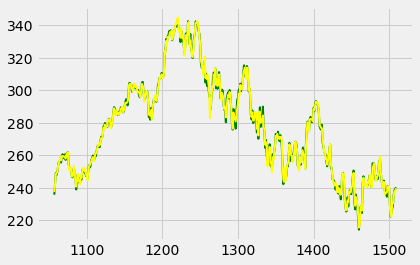

In [356]:
plt.plot(df_pred['Actual'], color='green', linewidth=2)
plt.plot(df_pred['Predicted'], color='yellow', linewidth=2)

<AxesSubplot:>

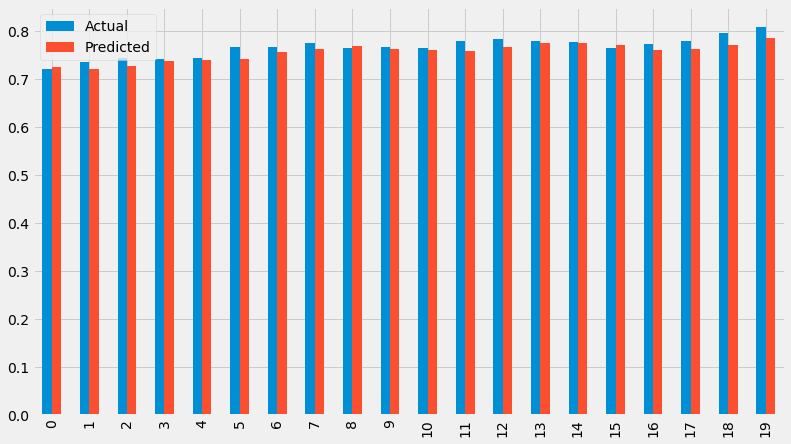

In [357]:
df_lstm[:20].plot(kind='bar', figsize=(12,7))

<AxesSubplot:>

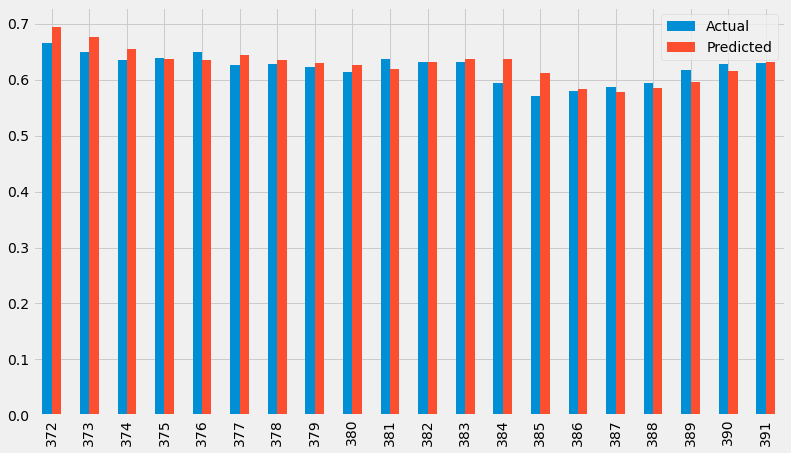

In [358]:
df_lstm[-20:].plot(kind='bar', figsize=(12,7))

## DeepLearning -- LSTM

In [68]:
data = df['Close']
data = data.reset_index()
data.drop('Date', axis=1, inplace=True)
data.head()

Close
0  62.500000
1  62.299999
2  62.740002
3  62.959999
4  63.520000

In [69]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(data))

In [70]:
scaled_data.shape

(1510, 1)

In [71]:
train_size = int(len(data)*0.70)
test_size = len(data) - train_size

train_set, test_set = scaled_data[0:train_size, :], scaled_data[train_size:scaled_data.shape[0], :]

In [72]:
train_set.shape, test_set.shape

((1057, 1), (453, 1))

In [73]:
type(train_set)

numpy.ndarray

In [74]:
# def  get_train_test_data(dataset, timestamp=1):
#     data_X = []
#     data_y = []
#     for i in range(timestamp, len(dataset)):
#         data_X.append(train_set[i-timestamp:i, 0])
#         data_y.append(train_set[i, 0])
#     return np.array(data_X), np.array(data_y)

In [75]:
def get_train_test_data(dataset, timestamp=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp), 0] 
        dataX.append(a)
        dataY.append(dataset[i + timestamp, 0])
    return np.array(dataX), np.array(dataY)

In [76]:
trainx , trainy = get_train_test_data(train_set, timestamp=60)

In [77]:
trainx.shape, trainy.shape

((996, 60), (996,))

In [78]:
testx, testy = get_train_test_data(test_set, timestamp=60)

In [79]:
testx.shape, testy.shape

((392, 60), (392,))

In [80]:
# reshape the data to [sample_size, time_step, features], here we're working with only 1 feature i.e. Close
train_X = trainx.reshape(trainx.shape[0], trainx.shape[1], 1)
test_X = testx.reshape(testx.shape[0], testx.shape[1], 1)

In [81]:
train_X.shape, test_X.shape

((996, 60, 1), (392, 60, 1))

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [91]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (train_X.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [84]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [92]:
# stop the training when there is no improvement in the loss for 100 consecutive epoch
# and save the best model observed during training for later use

callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1),
            ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)]
                         
# fit the model
history = model.fit(train_X, trainy, epochs=100, batch_size=32, 
                    callbacks=callbacks, validation_data=(test_X, testy))

Epoch 1/100
30/32 [===========================>..] - ETA: 0s - loss: 0.0093
Epoch 1: val_loss improved from inf to 0.00204, saving model to best_model.h5
32/32 [==============================] - 4s 47ms/step - loss: 0.0090 - val_loss: 0.0020
Epoch 2/100
31/32 [============================>.] - ETA: 0s - loss: 4.6078e-04
Epoch 2: val_loss improved from 0.00204 to 0.00175, saving model to best_model.h5
32/32 [==============================] - 1s 30ms/step - loss: 4.6442e-04 - val_loss: 0.0018
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 3.4676e-04
Epoch 3: val_loss improved from 0.00175 to 0.00151, saving model to best_model.h5
32/32 [==============================] - 1s 30ms/step - loss: 3.4729e-04 - val_loss: 0.0015
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 3.1411e-04
Epoch 4: val_loss did not improve from 0.00151
32/32 [==============================] - 1s 28ms/step - loss: 3.1309e-04 - val_loss: 0.0015
Epoch 5/100
30/32 [============

Epoch 36/100
30/32 [===========================>..] - ETA: 0s - loss: 1.6748e-04
Epoch 36: val_loss did not improve from 0.00083
32/32 [==============================] - 1s 29ms/step - loss: 1.6727e-04 - val_loss: 0.0013
Epoch 37/100
31/32 [============================>.] - ETA: 0s - loss: 1.7302e-04
Epoch 37: val_loss did not improve from 0.00083
32/32 [==============================] - 1s 29ms/step - loss: 1.7253e-04 - val_loss: 9.3665e-04
Epoch 38/100
32/32 [==============================] - ETA: 0s - loss: 1.8433e-04
Epoch 38: val_loss improved from 0.00083 to 0.00076, saving model to best_model.h5
32/32 [==============================] - 1s 30ms/step - loss: 1.8433e-04 - val_loss: 7.6309e-04
Epoch 39/100
32/32 [==============================] - ETA: 0s - loss: 1.7876e-04
Epoch 39: val_loss improved from 0.00076 to 0.00076, saving model to best_model.h5
32/32 [==============================] - 1s 28ms/step - loss: 1.7876e-04 - val_loss: 7.5540e-04
Epoch 40/100
30/32 [==============

Epoch 71/100
32/32 [==============================] - ETA: 0s - loss: 1.3670e-04
Epoch 71: val_loss did not improve from 0.00052
32/32 [==============================] - 1s 28ms/step - loss: 1.3670e-04 - val_loss: 0.0010
Epoch 72/100
31/32 [============================>.] - ETA: 0s - loss: 2.6426e-04
Epoch 72: val_loss did not improve from 0.00052
32/32 [==============================] - 1s 28ms/step - loss: 2.6476e-04 - val_loss: 5.4233e-04
Epoch 73/100
32/32 [==============================] - ETA: 0s - loss: 1.4534e-04
Epoch 73: val_loss did not improve from 0.00052
32/32 [==============================] - 1s 28ms/step - loss: 1.4534e-04 - val_loss: 5.5149e-04
Epoch 74/100
30/32 [===========================>..] - ETA: 0s - loss: 1.2556e-04
Epoch 74: val_loss improved from 0.00052 to 0.00051, saving model to best_model.h5
32/32 [==============================] - 1s 30ms/step - loss: 1.2780e-04 - val_loss: 5.1145e-04
Epoch 75/100
32/32 [==============================] - ETA: 0s - loss:

Text(0.5, 1.0, 'Validation loss vs. epochs')

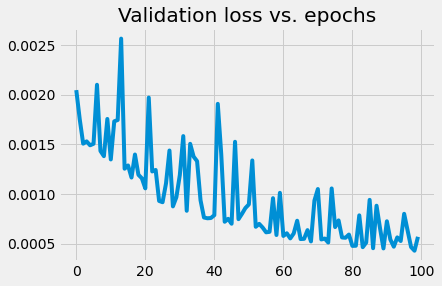

In [347]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss vs. epochs')

In [96]:
# load the saved model
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')

In [97]:
# get predictions for test set
test_predict = model.predict(test_X)
# transform the values to contain the same values range as testy data contains
test_predict_transformed = scaler.inverse_transform(test_predict)
# get predictions for train set
train_predict = model.predict(train_X)
train_predict_transformed = scaler.inverse_transform(train_predict)

32/32 [==============================] - 0s 8ms/step


In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
print('Train MSE:', np.sqrt(mean_squared_error(trainy, train_predict_transformed)))
print('Test MSE:', np.sqrt(mean_squared_error(testy,  test_predict_transformed)))

Train MSE: 143.98500009822843
Test MSE: 280.6644792786687


In [100]:
len(train_set), len(train_X), len(trainy), len(train_predict_transformed)

(1057, 996, 996, 996)

In [101]:
len(test_set), len(test_X), len(testy), len(test_predict_transformed)

(453, 392, 392, 392)

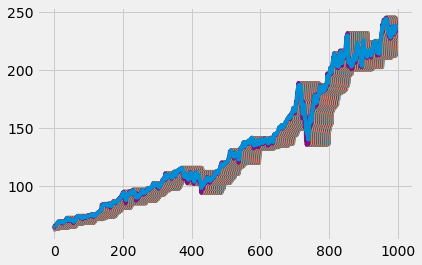

In [102]:
plt.plot(scaler.inverse_transform(trainx))
plt.plot(train_predict_transformed);

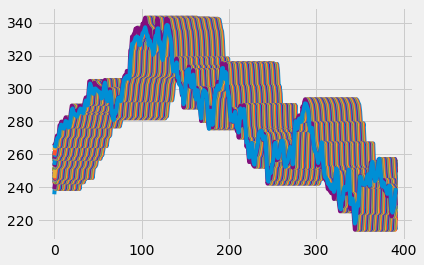

In [103]:
plt.plot(scaler.inverse_transform(testx))
plt.plot(test_predict_transformed);

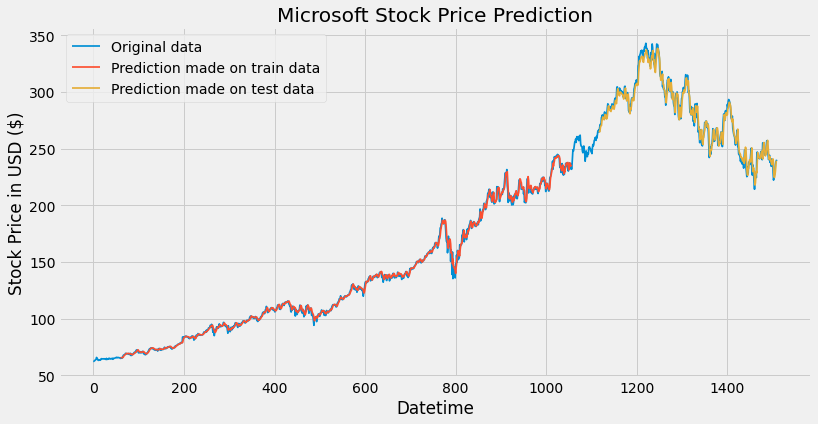

In [363]:
### Plotting 
# shift train predictions for plotting
look_back=60
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_transformed)+look_back, :] = train_predict_transformed

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_transformed)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict_transformed

# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(scaled_data), linewidth=1.7, label='Original data')
plt.plot(trainPredictPlot, linewidth=1.7, label='Prediction made on train data')
plt.plot(testPredictPlot, linewidth=1.7, label='Prediction made on test data')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Datetime')
plt.ylabel('Stock Price in USD ($)')
plt.legend()
plt.show()

In [327]:
testy.shape, ytest.shape, ypredicted.shape, test_predict.shape

((392,), (453,), (453,), (392, 1))

In [334]:
pd.Series(test_predict.reshape(1,-1)[0])

0      0.724747
1      0.721373
2      0.727828
3      0.737926
4      0.740468
         ...   
387    0.578067
388    0.585849
389    0.595673
390    0.615545
391    0.630964
Length: 392, dtype: float32

In [336]:
df_lstm = pd.DataFrame({'Actual': pd.Series(testy), 'Predicted': pd.Series(test_predict.reshape(1,-1)[0])})
df_lstm.head()

Actual  Predicted
0  0.721912   0.724747
1  0.735088   0.721373
2  0.744632   0.727828
3  0.742851   0.737926
4  0.745344   0.740468

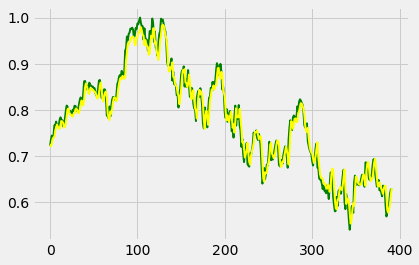

In [340]:
plt.plot(df_lstm['Actual'], color='green', linewidth=2)
plt.plot(df_lstm['Predicted'], color='yellow', linewidth=2)

<AxesSubplot:>

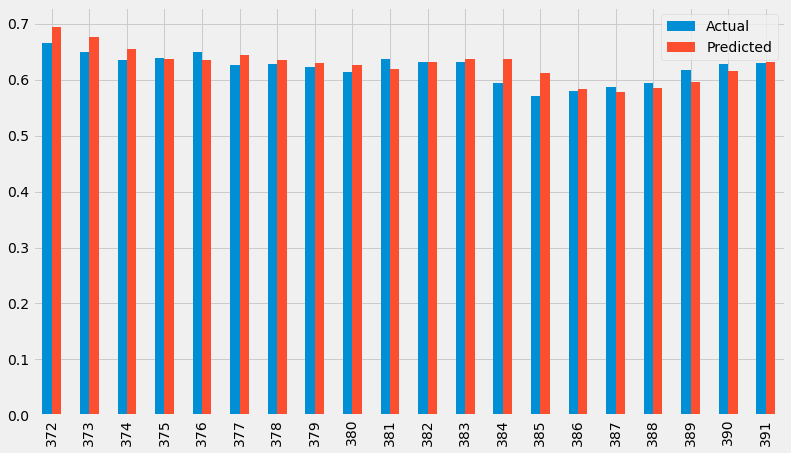

In [345]:
df_lstm[-20:].plot(kind='bar', figsize=(12,7))

In [364]:
# plt.figure(figsize=(12,6))

# plt.plot(scaler.inverse_transform(scaled_data), color='green')
# plt.plot(train_predict_transformed, color='yellow', linewidth=1.5, label='Predicted stock price train data')
# plt.plot(test_predict_transformed, color='red', linewidth=1.5, label='Predicted stock price test data')

# plt.plot(trainy, color='green', linewidth=2,  label='Actual stock price train data');
# plt.xticks(pd.date_range('2017-01-18', '2023-01-17', freq='Y'), rotation=45);
# # plt.plot(testy, color='blue', linewidth=2, label='Actual stock price test data')

# plt.title('Microsoft Stock Price Prediction')
# plt.xlabel('Datetime')
# plt.ylabel('Microsoft stock price')
# plt.legend()

In [367]:
data.index.min(), data.index.max()

(Timestamp('2017-01-18 00:00:00'), Timestamp('2023-01-17 00:00:00'))

In [379]:
test_set.shape, train_set.shape, trainx.shape, testy.shape, test_predict.shape

((453, 1), (1057, 1), (996, 60), (392,), (392, 1))

In [380]:
df_lstm.shape

(392, 2)

In [383]:
1057-996, 453-392

(61, 61)

In [386]:
test_set[392:].shape

(61, 1)

In [392]:
test_set[392:].reshape(1,-1).shape

(1, 61)

In [415]:
# forecasting stock closing price on 2023-01-18
# we spllited the train test data in such a way that to predict the tommowow's stock price our model 
# needs the previous 60 days data

input_18 = test_set[392:].reshape(1, -1)
temp_input = input_18.tolist()[0]

In [427]:
len(temp_input)

61

In [426]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input= x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.6191019  0.64036183 0.65863043 0.67077388 0.6019017  0.58562733
 0.61810478 0.60478621 0.59068412 0.56194585 0.54111324 0.56653968
 0.58961577 0.5931769  0.57765038 0.6434244  0.65813187 0.63833201
 0.63982768 0.63897299 0.63879493 0.63715684 0.64011258 0.65072472
 0.65980561 0.65948512 0.63907982 0.63398744 0.68672771 0.68512522
 0.6863004  0.66913574 0.65104521 0.64837436 0.65916457 0.65211356
 0.67736194 0.69306657 0.69413487 0.66489799 0.64951395 0.63441475
 0.6392223  0.64858802 0.62636662 0.62828961 0.62198646 0.61333289
 0.63640898 0.63217128 0.63131659 0.59399599 0.56981591 0.57914605
 0.58694492 0.59310571 0.6177487  0.62750616 0.63007017 0.63405867]
0 day output [[0.63935804]]
1 day input [0.64036183 0.65863043 0.67077388 0.6019017  0.58562733 0.61810478
 0.60478621 0.59068412 0.56194585 0.54111324 0.56653968 0.58961577
 0.5931769  0.57765038 0.6434244  0.65813187 0.63833201 0.63982768
 0.63897299 0.63879493 0.63715684 0.64011258 0.65072472 0.65980561
 0.659485

13 day output [[0.6561148]]
14 day input [0.57765038 0.6434244  0.65813187 0.63833201 0.63982768 0.63897299
 0.63879493 0.63715684 0.64011258 0.65072472 0.65980561 0.65948512
 0.63907982 0.63398744 0.68672771 0.68512522 0.6863004  0.66913574
 0.65104521 0.64837436 0.65916457 0.65211356 0.67736194 0.69306657
 0.69413487 0.66489799 0.64951395 0.63441475 0.6392223  0.64858802
 0.62636662 0.62828961 0.62198646 0.61333289 0.63640898 0.63217128
 0.63131659 0.59399599 0.56981591 0.57914605 0.58694492 0.59310571
 0.6177487  0.62750616 0.63007017 0.63405867 0.63935804 0.64222097
 0.64469016 0.64676529 0.6485424  0.65009004 0.65143907 0.65260005
 0.65358037 0.65438545 0.65502536 0.65551478 0.65587068 0.65611482]
14 day output [[0.65627235]]
15 day input [0.6434244  0.65813187 0.63833201 0.63982768 0.63897299 0.63879493
 0.63715684 0.64011258 0.65072472 0.65980561 0.65948512 0.63907982
 0.63398744 0.68672771 0.68512522 0.6863004  0.66913574 0.65104521
 0.64837436 0.65916457 0.65211356 0.67736194 

28 day output [[0.6589705]]
29 day input [0.68512522 0.6863004  0.66913574 0.65104521 0.64837436 0.65916457
 0.65211356 0.67736194 0.69306657 0.69413487 0.66489799 0.64951395
 0.63441475 0.6392223  0.64858802 0.62636662 0.62828961 0.62198646
 0.61333289 0.63640898 0.63217128 0.63131659 0.59399599 0.56981591
 0.57914605 0.58694492 0.59310571 0.6177487  0.62750616 0.63007017
 0.63405867 0.63935804 0.64222097 0.64469016 0.64676529 0.6485424
 0.65009004 0.65143907 0.65260005 0.65358037 0.65438545 0.65502536
 0.65551478 0.65587068 0.65611482 0.65627235 0.65636903 0.65642393
 0.65646023 0.65649819 0.65655285 0.65663731 0.65676075 0.65692997
 0.65714842 0.65741718 0.65773571 0.65810227 0.65851527 0.65897048]
29 day output [[0.6594596]]
[[0.6393580436706543], [0.6422209739685059], [0.6446901559829712], [0.6467652916908264], [0.6485424041748047], [0.6500900387763977], [0.6514390707015991], [0.6526000499725342], [0.653580367565155], [0.6543854475021362], [0.6550253629684448], [0.6555147767066956

In [428]:
day_new = np.arange(1, 61)
day_pred = np.arange(61, 91)

In [460]:
scaled_data.shape, day_new.shape, day_pred.shape

((1510, 1), (60,), (30,))

In [456]:
1510-60

1450

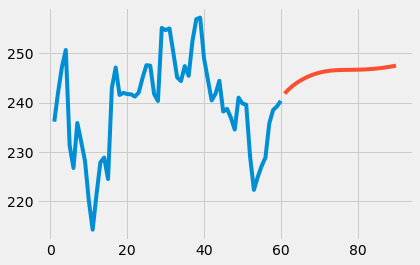

In [468]:
plt.plot(day_new, scaler.inverse_transform(scaled_data[1450:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

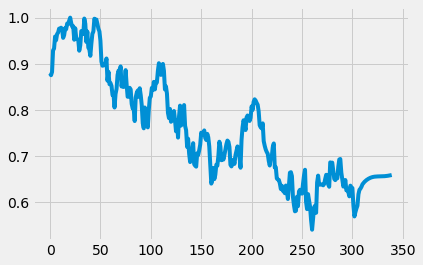

In [479]:
df_forecast = scaled_data.tolist()
df_forecast.extend(lst_output)
plt.plot(df_forecast[1200:])

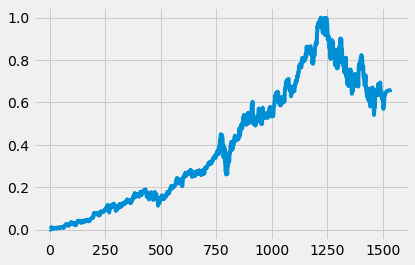

In [480]:
plt.plot(df_forecast)

## Is Microsoft stock worth buying in 2023?

In [ ]:
from datetime import datetime

In [ ]:
datetime.today()

In [ ]:
len(df.index)

In [ ]:
df.index.min(), df.index.max()

In [ ]:
pd.date_range('2017-01-18', '2023-01-17', freq='B')

In [ ]:
len(pd.date_range('2017-01-18', '2023-01-17', freq='Y'))

In [ ]:
# closing price of microsoft at 2023-01-18
